<a href="https://colab.research.google.com/github/Rhayem1920/Dimensionality-Reduction-PCA/blob/main/Dimensionality_Reduction_PCA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns
font={'size': 14,
        'weight' : 'bold',
        'family':'monospace'} # weight could be book,bold etc ...
mpl.rc('font',**font)
sns.set_style('darkgrid')

# to make this notebook's output stable across runs
np.random.seed(42)


# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

## Introduction to Dimensionalty Reduction:

Many Machine Learning problems involve thousands or even millions of features for
each training instance. Not only does this make training extremely slow, it can also
make it much harder to find a good solution, as we will see. This problem is often
referred to as the curse of dimensionality.

Reducing dimensionality does lose some information (just like
compressing an image to JPEG can degrade its quality), so even
though it will speed up training, it may also make your system perform slightly worse. It also makes your pipelines a bit more com‐
plex and thus harder to maintain. So you should first try to train
your system with the original data before considering using dimensionality reduction if training is too slow. In some cases, however,
reducing the dimensionality of the training data may filter out
some noise and unnecessary details and thus result in higher performance (but in general it won’t; it will just speed up training).

In this chapter we will discuss the curse of dimensionality and get a sense of what
goes on in high-dimensional space. Then, we will present the two main approaches to
dimensionality reduction (projection and Manifold Learning).

**We will go
through three of the most popular dimensionality reduction techniques: PCA, Kernel
PCA, and LLE.**

  #### **1.Projection**

  In most real-world problems, training instances are not spread out uniformly across
all dimensions. Many features are almost constant, while others are highly correlated
(as discussed earlier for MNIST). As a result, all training instances actually lie within
(or close to) a much lower-dimensional subspace of the high-dimensional space.
However, projection is not always the best approach to dimensionality reduction. In
many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset: 

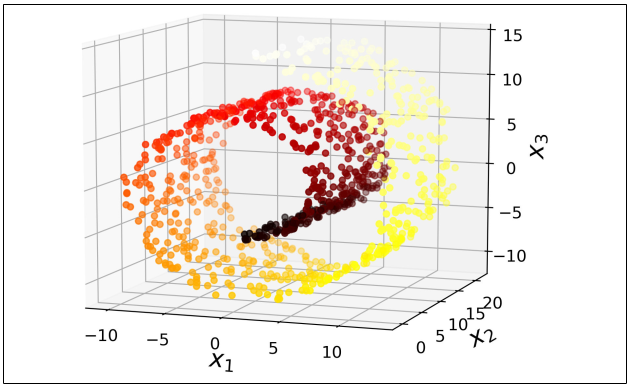

Simply projecting onto a plane (e.g., by dropping x 3 ) would squash different layers of
the Swiss roll together, as shown on the left of Figure 8-5. However, what you really
want is to unroll the Swiss roll to obtain the 2D dataset

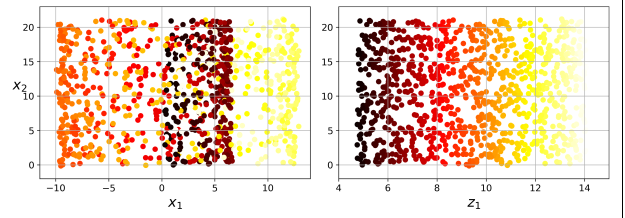

### **Manifold Learning**:

   The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a 2D
shape that can be bent and twisted in a higher-dimensional space. More generally, a
d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally
resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it
locally resembles a 2D plane, but it is rolled in the third dimension.
Many dimensionality reduction algorithms work by modeling the manifold on which
the training instances lie; this is called Manifold Learning. It relies on the manifold
assumption, also called the manifold hypothesis, which holds that most real-world
high-dimensional datasets lie close to a much lower-dimensional manifold. This
assumption is very often empirically observed.

The manifold assumption is often accompanied by another implicit assumption: that
the task at hand (e.g., classification or regression) will be simpler if expressed in the
lower-dimensional space of the manifold. For example, in the top row of the igure
the Swiss roll is split into two classes: in the 3D space (on the left), the decision boundary would be fairly complex, but in the 2D unrolled manifold space (on the
right), the decision boundary is a simple straight line.
However, this assumption does not always hold. For example, in the bottom row of
Figure, the decision boundary is located at x 1 = 5. This decision boundary looks
very simple in the original 3D space (a vertical plane), but it looks more complex in
the unrolled manifold (a collection of four independent line segments).
In short, if you reduce the dimensionality of your training set before training a
model, it will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

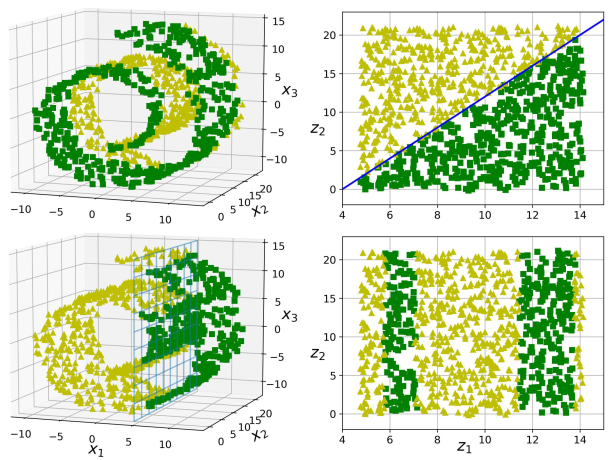

#### **3.PCA**
   Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.
  
  **a. Preserving the Variance**

  Before you can project the training set onto a lower-dimensional hyperplane, you
first need to choose the right hyperplane. For example, a simple 2D dataset is repre‐
sented on the left of Figure 8-7, along with three different axes (i.e., one-dimensional
hyperplanes). On the right is the result of the projection of the dataset onto each of
these axes. As you can see, the projection onto the solid line preserves the maximum
variance, while the projection onto the dotted line preserves very little variance, and
the projection onto the dashed line preserves an intermediate amount of variance.


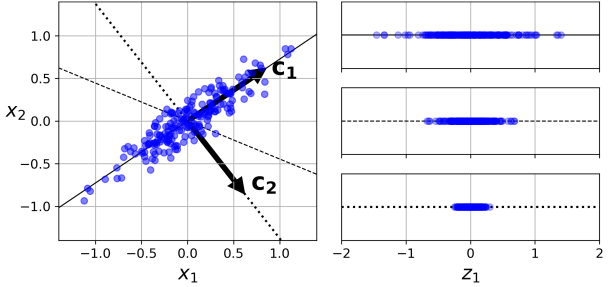

It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections. Another
way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. This is the rather
simple idea behind **PCA**

   **b.Principal Components**

   PCA identifies the axis that accounts for the largest amount of variance in the train‐
ing set. In the previous figure , it is the solid line. It also finds a second axis, orthogonal to the
first one, that accounts for the largest amount of remaining variance. In this 2D
example there is no choice: it is the dotted line. If it were a higher-dimensional data‐
set, PCA would also find a third axis, orthogonal to both previous axes, and a fourth,
a fifth, and so on—as many axes as the number of dimensions in the dataset.
The unit vector that defines the i th axis is called the i th principal component (PC).

**N.B**:  The direction of the principal components is not stable: if you perturb the training set slightly and run PCA again, some of the new
PCs may point in the opposite direction of the original PCs. However, they will generally still lie on the same axes. In some cases, a
pair of PCs may even rotate or swap, but the plane they define will
generally remain the same.

So how can you find the principal components of a training set? Luckily, there is a
standard matrix factorization technique called Singular Value Decomposition (SVD)
that can decompose the training set matrix X into the matrix multiplication of three
matrices U.Σ.T(V) , where V contains all the principal components that we are looking for.


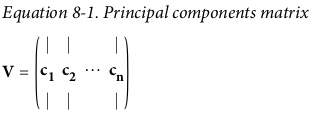


In [ ]:
# a 3D dataset:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [ ]:
# the PC matrix:
X_centered=X-X.mean(axis=0)
U,S,V=np.linalg.svd(X)
pd.DataFrame(V)


,0,1,2
0,0.924802,0.327707,0.193259
1,-0.370525,0.891080,0.262081
2,-0.086324,-0.313981,0.945497


In [ ]:
# the PCA :
c1 = V.T[:, 0]
c2 = V.T[:, 1]
c3=V.T[:,2]
pd.DataFrame(c1) #the first principale component(feature)

,0
0,0.924802
1,0.327707
2,0.193259


**N.B**: 
PCA assumes that the dataset is centered around the origin. As we
will see, Scikit-Learn’s PCA classes take care of centering the data
for you. However, if you implement PCA yourself (as in the pre‐
ceding example), or if you use other libraries, don’t forget to center
the data first.

 **c.Projecting Down to d Dimensions**:

  Once you have identified all the principal components, you can reduce the dimen‐
sionality of the dataset down to d dimensions by projecting it onto the hyperplane
defined by the first d principal components. Selecting this hyperplane ensures that the
projection will preserve as much variance as possible.

to project the training set onto the hyperplane, you can simply compute the matrix
multiplication of the training set matrix X by the matrix W , defined as the matrix
containing the first d principal components (i.e., the matrix composed of the first d
columns of V)

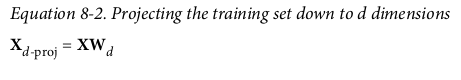

In [ ]:
# let's compute that:
W_d=V.T[:,:2]
X_projected=X_centered.dot(W_d)
# we now know how to reduce the dimensionality of any dataset down to any number of dimensions, while preserving as much variance as possible.

**d.With Sklearn**

   Scikit-Learn’s PCA class implements PCA using SVD decomposition just like we did
before. The following code applies PCA to reduce the dimensionality of the dataset
down to two dimensions (note that it automatically takes care of centering the data):




In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)

**N.B**:

  After fitting the PCA transformer to the dataset, you can access the principal compo‐
nents using the components_ variable (note that it contains the PCs as horizontal vectors, so, for example, the first principal component is equal to pca.components_.T[:,
0] ).

In [ ]:
# showing the 2 principal components
pd.DataFrame(pca.components_.T)

,0,1
0,-0.936361,0.340275
1,-0.298549,-0.901191
2,-0.184652,-0.268454


**e.Explained Variance Ratio**

 Another very useful piece of information is the explained variance ratio of each prin‐
cipal component, available via the **explained_variance_ratio_** variable. It indicates
the proportion of the dataset’s variance that lies along the axis of each principal component. For example, let’s look at the explained variance ratios of the first two components of the 3D dataset represented

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

**This tells you that 84.2% of the dataset’s variance lies along the first axis, and 14.6%
lies along the second axis. This leaves less than 1.2% for the third axis, so it is reasonable to assume that it probably carries little information**

**f.Choosing the Right Number of Dimensions**

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
generally preferable to choose the number of dimensions that add up to a sufficiently
large portion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for data visualization—in that case you will generally want to reduce the
dimensionality down to 2 or 3.
The following code computes PCA without reducing dimensionality, then computes
the minimum number of dimensions required to preserve 95% of the training set’s
variance: 

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split
X = mnist["data"]
y = mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
# you can retrain PCA with n_components equal to d:



In [ ]:
pca=PCA(n_components=d)
pca.fit(X_train)
X_new=pca.transform(X_train)
pca.explained_variance_ratio_

array([0.09719832, 0.07155316, 0.06170876, 0.05401742, 0.04905855,
       0.0430278 , 0.03278245, 0.02884629, 0.02748578, 0.02356632,
       0.02108144, 0.02040221, 0.01706009, 0.01686189, 0.01576744,
       0.01493166, 0.0132792 , 0.01284905, 0.01186795, 0.01144615,
       0.01066611, 0.01009644, 0.00958792, 0.00902655, 0.00879315,
       0.00835302, 0.0080838 , 0.00787544, 0.00741299, 0.00688476,
       0.00655737, 0.00647011, 0.00598237, 0.00585278, 0.00567335,
       0.0054527 , 0.00505394, 0.00489152, 0.00480259, 0.00465999,
       0.00455198, 0.00445293, 0.00416951, 0.00397401, 0.00384236,
       0.00375304, 0.0036188 , 0.00348855, 0.00337779, 0.00321521,
       0.00318462, 0.00308914, 0.00296798, 0.00286653, 0.00282645,
       0.0026906 , 0.00267981, 0.00257117, 0.00254425, 0.00246185,
       0.00239921, 0.00236976, 0.00228849, 0.00220956, 0.00212458,
       0.00205084, 0.00202087, 0.00195857, 0.00192135, 0.00187604,
       0.00186431, 0.00179534, 0.00176207, 0.00173921, 0.00165

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_).head()

,0
0,0.097198
1,0.071553
2,0.061709
3,0.054017
4,0.049059


In [ ]:
pd.DataFrame(pca.components_.T).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,2.257848e-19,-2.149502e-17,3.406807e-17,7.559509e-17,1.116438e-17,-8.143716e-17,3.374440e-17,9.194180e-17,5.948758e-17,3.557999e-17,-7.817958e-18,1.532228e-17,-6.465156e-18,-2.224941e-17,-1.673770e-18,-6.809809e-17,-2.204678e-17,-2.286630e-17,4.341915e-17,-4.625535e-17,5.457041e-17,1.532660e-17,-5.047232e-17,1.181421e-17,1.893480e-17,-1.506405e-17,2.226500e-18,1.812611e-17,-5.461740e-17,-1.591391e-17,-1.766127e-17,2.478574e-17,-4.925469e-17,-2.008435e-17,4.994642e-17,5.047088e-18,-3.684321e-17,3.569480e-17,-6.166263e-17,1.697471e-17,...,-2.636430e-17,8.962959e-18,-2.476850e-17,-1.619347e-17,3.788464e-17,2.630281e-17,1.197100e-17,-3.112155e-17,3.461278e-17,-2.124462e-17,-3.087001e-17,-1.745973e-17,-5.397587e-17,-5.794569e-19,-1.416628e-17,-3.627998e-17,-3.785608e-17,4.366110e-18,-4.406786e-17,-6.199294e-17,-1.957170e-17,-5.215732e-18,-3.403884e-17,-2.403605e-17,-8.063569e-18,2.369243e-17,1.655927e-17,-1.272320e-17,-6.297583e-17,7.445335e-17,6.254492e-17,2.101563e-17,-8.243606e-17,3.511902e-17,-5.414695e-18,4.754418e-17,-2.361144e-17,7.214151e-17,1.829157e-18,-7.606139e-17
1,5.950862e-17,5.266535e-17,-1.011209e-16,1.422002e-16,5.363017e-17,6.098665e-17,2.526059e-17,1.248822e-16,-6.908846e-17,2.470428e-17,-5.411515e-17,1.991509e-17,1.143921e-16,2.155485e-17,-1.459407e-16,2.229877e-17,6.313313e-19,-2.091602e-17,2.883785e-17,-4.089521e-17,5.369485e-17,-7.313310e-17,3.908887e-18,-6.933197e-17,-8.499872e-17,-2.457983e-17,1.461473e-17,-2.649860e-17,-3.211371e-17,3.295280e-17,-5.057302e-17,-3.312633e-18,-1.597836e-17,-4.074045e-17,5.015051e-19,-3.356459e-17,-5.255677e-17,6.351753e-17,2.892513e-17,4.315466e-19,...,2.574616e-17,1.825665e-17,1.288345e-17,-8.142110e-17,4.725646e-17,-2.137300e-17,-1.495834e-17,1.315829e-18,1.041635e-17,-5.365180e-17,-5.431025e-17,-2.190014e-18,-9.066898e-18,-9.330819e-18,3.085288e-18,-1.108160e-17,3.322496e-17,1.033546e-17,2.856299e-17,3.220753e-17,-3.374537e-17,7.921037e-17,2.049108e-17,4.622033e-17,6.482331e-17,8.474893e-17,-5.551999e-20,-5.609104e-17,-1.846706e-17,-3.420240e-17,3.975542e-17,1.541175e-17,4.378001e-17,3.209709e-17,9.994612e-18,3.388758e-18,-6.176213e-17,1.288568e-17,-5.965765e-17,3.558078e-17
2,-1.498864e-18,1.432582e-17,-5.014550e-18,-1.985377e-17,-2.424775e-17,-7.035053e-17,-6.331147e-17,-3.372703e-18,3.675668e-17,-1.489782e-17,-1.376002e-17,5.061135e-17,5.912361e-17,5.349477e-17,-7.295661e-17,-4.168970e-17,-9.955303e-17,-3.051459e-17,-4.919216e-20,3.626212e-17,-5.706852e-17,1.474381e-17,-9.918423e-17,3.659469e-17,-6.715430e-17,-5.410780e-17,-7.807611e-18,4.220945e-18,-3.440151e-18,4.324842e-17,-7.480485e-17,-4.648540e-17,8.145671e-17,-1.132588e-17,-4.150674e-17,-1.943684e-17,-5.902822e-17,-3.165176e-17,-7.834379e-17,-1.466677e-17,...,-2.001211e-17,-4.715460e-17,-1.414254e-17,-2.019158e-17,-1.165232e-17,3.154112e-17,-2.270005e-18,8.229523e-17,-9.572273e-19,4.252360e-17,-2.268629e-17,-1.006462e-17,-9.659857e-18,4.366727e-17,1.214620e-17,5.262938e-17,-1.213501e-17,-1.416180e-17,4.709541e-17,4.076019e-17,3.562645e-17,1.000132e-17,5.365247e-17,1.471399e-17,-4.109905e-18,-9.367847e-19,1.104784e-17,1.576254e-17,3.984961e-17,4.657174e-17,-1.693456e-18,2.545712e-17,-8.738910e-19,3.623753e-18,-2.547443e-17,4.181095e-17,-7.338411e-18,-8.829833e-17,5.932885e-17,-5.102973e-17
3,-4.084543e-18,1.392593e-17,2.785633e-18,-3.930202e-17,-2.276375e-17,1.453480e-17,-1.933956e-17,3.585062e-17,-1.480137e-17,-4.772931e-17,-5.889008e-17,-3.196202e-17,5.874631e-18,8.099431e-17,-1.188596e-17,1.700661e-16,1.003799e-16,2.395931e-17,-5.828578e-17,3.806307e-17,-3.318749e-17,-2.530976e-18,-2.357248e-17,-4.796259e-17,-1.595050e-17,-1.143447e-17,-1.952584e-17,3.982994e-17,-9.066703e-18,7.521931e-17,1.220572e-17,1.340746e-16,-6.604447e-17,-1.874574e

N.B: 

However, there is a much
better option: instead of specifying the number of principal components you want to
preserve, you can set n_components to be a float between 0.0 and 1.0 , indicating the
ratio of variance you wish to preserve:

In [ ]:
pca=PCA(n_components=0.95)
pca.fit_transform(X_train)

array([[-563.82559445,  376.21158523,  547.80926275, ...,   27.55021763,
         -28.99365655,   22.0882605 ],
       [-247.60677317,  594.11581251, -761.17658851, ...,   21.21515701,
         -12.91702701,  -71.9678063 ],
       [ -76.10689476, -718.88626736, -621.34715832, ...,  -15.63703969,
          27.32682087,  -46.49334898],
       ...,
       [ 446.89768572,  200.53844512, -326.08785445, ...,  -16.17022423,
          28.40929801,   53.86153314],
       [ 794.82898692, -164.97878958,   48.41468923, ...,  -51.41226115,
           3.66933099,    7.84388081],
       [-903.11423891, -456.07654002, -139.58512285, ...,    3.89819809,
          58.74804585,    2.75381847]])

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_).head()

,0
0,0.097198
1,0.071553
2,0.061709
3,0.054017
4,0.049059


In [ ]:
pd.DataFrame(pca.components_.T).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,-2.584316e-19,2.342410e-19,3.954960e-19,-1.493912e-19,7.183079e-20,1.231083e-19,-1.464951e-19,-2.400412e-19,3.777749e-19,9.186084e-19,3.486557e-19,-3.519558e-19,-4.276996e-19,-5.452521e-19,2.266807e-19,-1.515017e-19,6.420587e-19,-9.497082e-20,6.012669e-19,-1.736605e-18,4.390408e-19,5.633837e-19,1.811252e-19,2.629632e-19,2.545223e-19,3.012266e-19,-1.033068e-19,-1.604090e-18,1.872006e-19,-6.744660e-19,-6.080690e-19,9.511630e-19,1.714705e-18,-1.364080e-18,4.785442e-19,-3.032085e-19,1.134731e-18,2.433300e-19,1.848167e-18,4.995403e-19,...,1.712918e-18,2.600546e-18,3.948735e-18,-2.242597e-19,-1.984498e-18,6.396403e-19,1.737819e-18,-9.255764e-19,-1.320566e-18,2.430995e-18,5.064409e-18,-1.421291e-18,-6.720141e-19,4.466963e-18,3.339972e-18,-1.173209e-18,-6.708832e-19,2.219993e-19,-6.441766e-19,2.783947e-18,-2.982285e-18,-1.918574e-18,-4.014997e-18,-4.716588e-18,2.816245e-18,5.955368e-19,-7.817681e-19,4.252518e-18,1.651546e-18,1.771384e-18,3.222022e-18,-2.105679e-18,9.828416e-20,-1.045055e-17,-4.848216e-18,-4.299680e-18,-4.595534e-18,2.660599e-18,-2.827923e-18,2.186704e-18
1,-2.220446e-16,5.551115e-17,-0.000000e+00,-6.938894e-17,-6.938894e-17,-2.775558e-17,0.000000e+00,-6.938894e-17,-8.326673e-17,1.110223e-16,5.551115e-17,-4.163336e-17,-8.326673e-17,-5.551115e-17,5.551115e-17,-2.081668e-17,0.000000e+00,4.163336e-17,5.551115e-17,-5.551115e-17,6.938894e-17,4.163336e-17,-3.469447e-18,-3.469447e-17,3.469447e-17,-2.081668e-17,3.469447e-18,0.000000e+00,2.775558e-17,-1.387779e-17,7.632783e-17,-1.387779e-17,-1.665335e-16,-4.163336e-17,5.551115e-17,-3.816392e-17,1.387779e-16,1.734723e-17,-5.551115e-17,-1.110223e-16,...,-1.422473e-16,1.526557e-16,9.714451e-17,-1.266348e-16,2.810252e-16,-1.821460e-17,3.226586e-16,-1.214306e-16,-4.510281e-17,1.734723e-17,3.608225e-16,1.838807e-16,-2.524023e-16,-1.387779e-16,-1.353084e-16,-2.064321e-16,-9.974660e-17,-1.084202e-17,-3.235259e-16,-2.428613e-16,1.769418e-16,8.673617e-18,-2.775558e-17,-4.163336e-17,-6.245005e-17,-7.546047e-17,2.688821e-17,2.775558e-16,-1.682682e-16,-1.769418e-16,1.561251e-16,-5.204170e-18,-4.922278e-17,-1.387779e-16,-8.326673e-17,-1.908196e-16,-2.775558e-17,-3.122502e-17,4.371503e-16,3.261280e-16
2,1.110223e-16,0.000000e+00,-0.000000e+00,-9.714451e-17,1.387779e-17,3.469447e-18,-1.270685e-16,-4.163336e-17,1.179612e-16,1.665335e-16,6.245005e-17,-8.326673e-17,-4.163336e-17,-9.714451e-17,3.816392e-17,-1.040834e-17,1.526557e-16,-1.474515e-16,4.163336e-17,-2.498002e-16,4.857226e-17,6.245005e-17,-2.775558e-17,1.873501e-16,1.040834e-17,1.040834e-16,-3.469447e-17,-3.330669e-16,6.245005e-17,6.245005e-17,2.081668e-17,-1.387779e-16,6.938894e-17,-1.387779e-16,1.387779e-16,-4.163336e-17,9.714451e-17,1.092876e-16,2.081668e-16,2.081668e-17,...,-7.285839e-17,6.938894e-17,-2.706169e-16,2.554380e-16,-1.040834e-16,2.107689e-16,-6.765422e-17,-1.144917e-16,1.804112e-16,4.544976e-16,-2.498002e-16,1.127570e-16,-1.804112e-16,-3.261280e-16,-2.810252e-16,1.561251e-17,8.239937e-17,-1.216475e-16,4.336809e-18,2.185752e-16,-6.245005e-17,1.092876e-16,-1.665335e-16,6.938894e-18,-9.367507e-17,7.719519e-17,-1.569925e-16,1.630640e-16,-2.046974e-16,-1.370432e-16,1.144917e-16,-2.949030e-16,5.290907e-17,-2.914335e-16,-6.938894e-17,-9.367507e-17,-2.012279e-16,-6.245005e-17,2.324529e-16,-4.510281e-17
3,-0.000000e+00,0.000000e+00,-1.110223e-16,5.551115e-17,-5.551115e-17,1.387779e-17,-6.938894e-17,-5.551115e-17,1.387779e-16,5.551115e-17,0.000000e+00,4.163336e-17,-8.326673e-17,-2.775558e-17,-6.938894e-17,1.023487e-16,2.081668e-17,-2.428613e-17,-4.510281e-17,-6.938894e-17,1.795439e-16,1.899522e-16,1.057368e-16,5.984796e-17,-1.240327e-16,-6.505213e-17,9.931292e-17,-3.816392e-17,5.724587e-17,2.428613e-17,4.163336e-17,-6.245005e-17,6.245005e-17,-4.163336e-17,-8.6

**N.B**:

Yet another option is to plot the explained variance as a function of the number of
dimensions (simply plot cumsum ; see Figure 8-8). There will usually be an elbow in the
curve, where the explained variance stops growing fast. You can think of this as the
intrinsic dimensionality of the dataset. In this case, you can see that reducing the dimensionality down to about 100 dimensions wouldn’t lose too much explained variance.

Text(70, 0.7, 'Elbow')

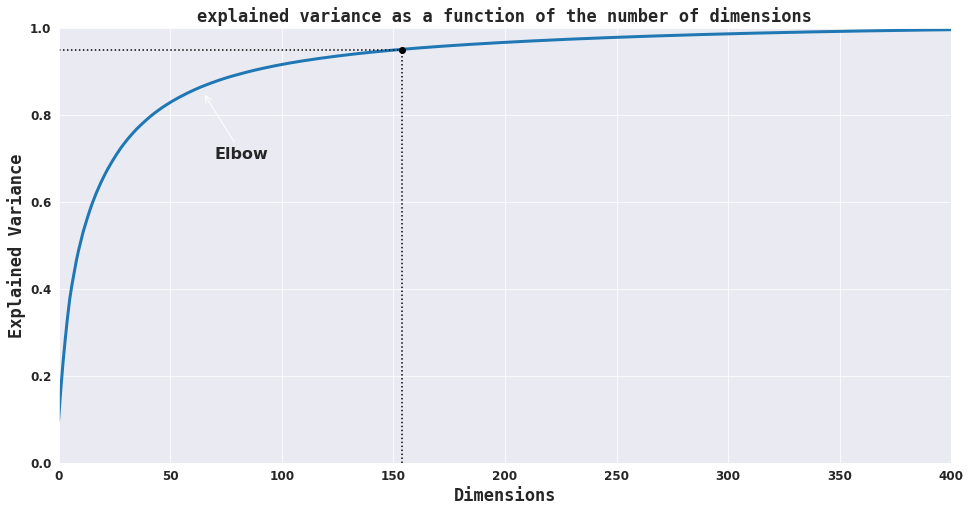

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions",fontdict=font,fontsize=17)
plt.ylabel("Explained Variance",fontdict=font,fontsize=17)
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.title('explained variance as a function of the number of dimensions',fontdict=font,fontsize=17)
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)

In [ ]:
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))


154
0.9503684424557437


**g.PCA for Compression**:

 Obviously after dimensionality reduction, the training set takes up much less space.
For example, try applying PCA to the MNIST dataset while preserving 95% of its var‐
iance. You should find that each instance will have just over 150 features, instead of
the original 784 features. So while most of the variance is preserved, the dataset is
now less than 20% of its original size! This is a reasonable compression ratio, and you
can see how this can speed up a classification algorithm (such as an SVM classifier)
tremendously.
It is also possible to decompress the reduced dataset back to 784 dimensions by
applying the inverse transformation of the PCA projection. Of course this won’t give
you back the original data, since the projection lost a bit of information (within the
5% variance that was dropped), but it will likely be quite close to the original data.
The mean squared distance between the original data and the reconstructed data
(compressed and then decompressed) is called the reconstruction error. For example,
the following code compresses the MNIST dataset down to 154 dimensions, then uses
the inverse_transform() method to decompress it back to 784 dimensions.

Text(0.5, 1.0, 'Compressed')

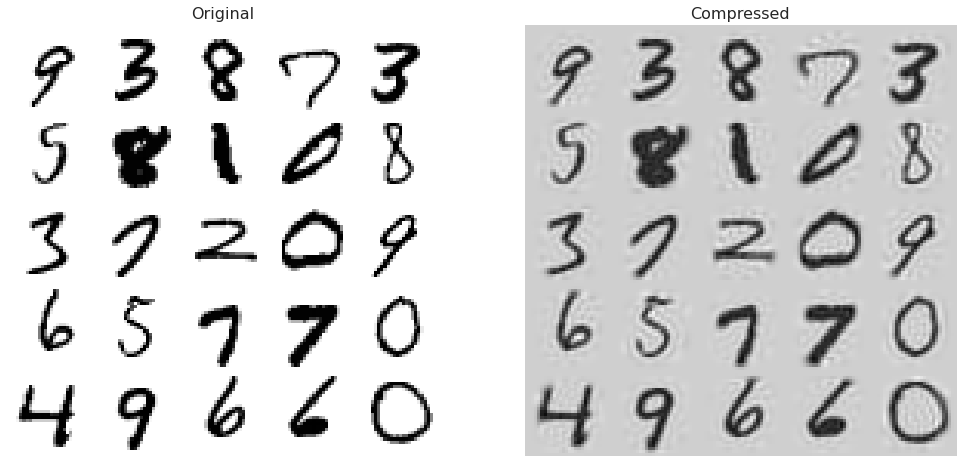

In [ ]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")



plt.figure(figsize=(17, 9))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)




**h.Randomized PCA**:

If you set the svd_solver hyperparameter to "randomized" , Scikit-Learn uses a sto‐
chastic algorithm called Randomized PCA that quickly finds an approximation of the
first d principal components. Its computational complexity is O(m × d²) + O(d³ ),
instead of O(m × n²) + O(n³) for the full SVD approach, so it is dramatically faster
than full SVD when d is much smaller than n:

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

By default, svd_solver is actually set to "auto" : Scikit-Learn automatically uses the
randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m
or n, or else it uses the full SVD approach. If you want to force Scikit-Learn to use full
SVD, you can set the svd_solver hyperparameter to "full" .

**i.Incremental PCA**:

   One problem with the preceding implementations of PCA is that they require the
whole training set to fit in memory in order for the algorithm to run. Fortunately,
Incremental PCA (IPCA) algorithms have been developed: you can split the training
set into mini-batches and feed an IPCA algorithm one mini-batch at a time. This is
PCA
|
227useful for large training sets, and also to apply PCA online (i.e., on the fly, as new
instances arrive).
The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s
array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class 5 to
reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like
before). Note that you must call the partial_fit() method with each mini-batch
rather than the fit() method with the whole training set:

In [ ]:
from sklearn.decomposition import IncrementalPCA
inc_pca=IncrementalPCA(n_components=154)
n_batches=100
for batch in np.array_split(X_train,n_batches):
  inc_pca.partial_fit(batch)
X_new=inc_pca.transform(X_train)  